<a href="https://colab.research.google.com/github/Tanvi-Gajula/Projects/blob/main/Amazon_Sales_Dataset_kmeans_clustering_for_customer_grouping_and_price_prediction_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Amazon sales dataset
dataset = pd.read_csv('/content/archive (14).zip')
dataset

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

EDA

In [ ]:
# Data Overview
dataset.shape

(1465, 16)

In [ ]:
dataset.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
# Data Preprocessing
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
dataset_drop = dataset.dropna()

In [ ]:
dataset_drop.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
dataset.loc[dataset["rating"].isin(["|"])] = "0"


columns_need_change = [ "discounted_price"  ,  "actual_price"   ,  "discount_percentage"   ,  "rating"  ,   "rating_count" ]

for i in columns_need_change:
    dataset[i] = dataset[i].str.replace("₹","")
    dataset[i] = dataset[i].str.replace("%","")
    dataset[i] = dataset[i].str.replace(",","")

    dataset[i] = dataset[i].astype("float")

In [ ]:
dataset.drop_duplicates(subset=["product_id"],inplace=True)

In [ ]:
df = dataset.drop(columns=['product_link','img_link','review_content'])

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second..."


In [ ]:
# Which Category capture the market
df['category'].value_counts()

Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                                      

In [ ]:
df['category'] = df.category.apply(lambda x:x.split('|')[0].replace('&',' & '))
df['category'].value_counts()

Electronics                526
Computers & Accessories    453
Home & Kitchen             448
OfficeProducts              31
MusicalInstruments           2
HomeImprovement              2
Toys & Games                 1
Car & Motorbike              1
Health & PersonalCare        1
Name: category, dtype: int64

<Axes: xlabel='count', ylabel='category'>

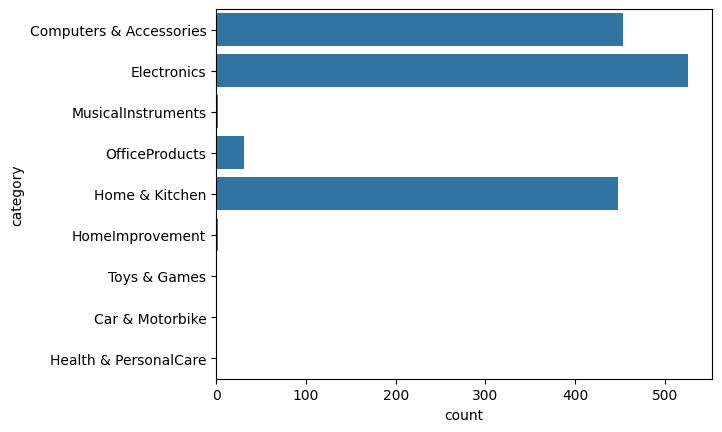

In [ ]:
sns.countplot(data = df, y = 'category')

In [ ]:
# label encoding
label_encoder = preprocessing.LabelEncoder()
dataset['product_id']= label_encoder.fit_transform(dataset['product_id'])
dataset['product_name']= label_encoder.fit_transform(dataset['product_name'])
dataset['user_id']= label_encoder.fit_transform(dataset['user_id'])
dataset['user_name']= label_encoder.fit_transform(dataset['user_name'])
dataset['discounted_price']= label_encoder.fit_transform(dataset['discounted_price'])
dataset['actual_price']= label_encoder.fit_transform(dataset['actual_price'])
dataset['category']= label_encoder.fit_transform(dataset['category'])
dataset['discount_percentage']= label_encoder.fit_transform(dataset['discount_percentage'])
dataset['about_product']= label_encoder.fit_transform(dataset['about_product'])
dataset['review_id']= label_encoder.fit_transform(dataset['review_id'])
dataset['review_title']= label_encoder.fit_transform(dataset['review_title'])
dataset['review_content']= label_encoder.fit_transform(dataset['review_content'])
dataset['img_link']= label_encoder.fit_transform(dataset['img_link'])
dataset['product_link']= label_encoder.fit_transform(dataset['product_link'])

print(dataset['user_id'].unique())
print(dataset['product_name'].unique())
print(dataset['product_id'].unique())
print(dataset['actual_price'].unique())

[623  88 849 ... 865 300 433]
[1158  134 1023 ...  164  462  195]
[346 848 819 ...  27  61 134]
[  6 258  65 379 270   0 318 206 448 255 411 394 430 195 179  60 182 129
 127 128  75 402 353 374  66 309 378 257  43  16 313 269 135 338 133  94
  31 180  36 311 422  32 102 172 303 245 244 196 124  23 268 300 341 420
 248  62 205 372 173 187 107 305 306  53 352 201  15 256  37 315 440 144
  25 175 106  44 423  14 183 150 312 314 120  83 393 344 260  52 247 435
 112 350 367  35 138 299  55   7 316 346 409 410 447  28 424 403 290 194
 373 212 121 376 375 408 259 343 337 285 202 308 438   3 197 229 103 339
 377 336 125 437 391 419 203 365  90  61 392 116 177  81 414 317 113 334
 176 242 254 264 199 371 117 167 204  46  98 366 362 170 145 104 323 252
 267 228 156  19 432 397 282 429 190  74 250 335 115  21 149 326  27  22
 404 151 122 185 284 345 226 198 164 302 114 207 426 148  99 347 222 263
 307 130 168  82  59 184  49 134 273  13 445 227 395 351 384 155 147 297
 400 160 329  29 221 169 118

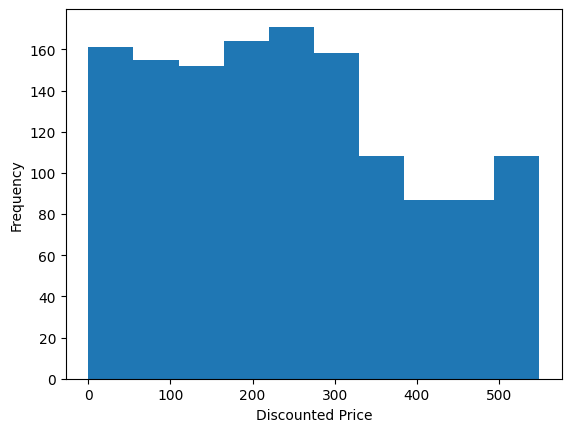

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of discounted_price
plt.hist(dataset['discounted_price'])
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

<Axes: >

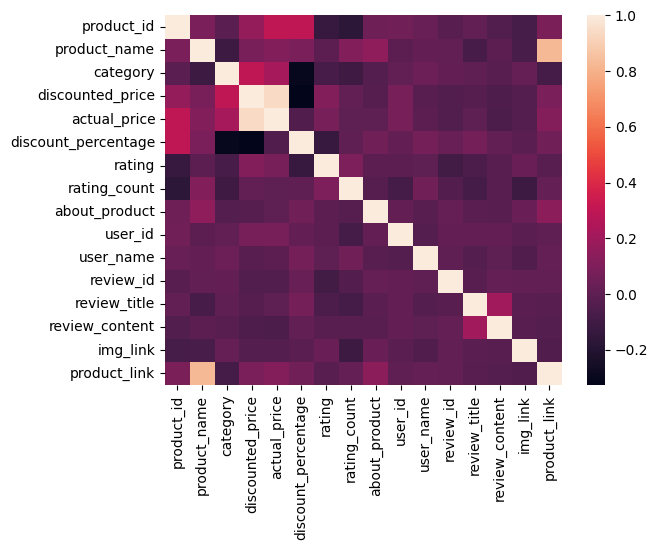

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
#K-means Clustering groups the customers with other similar interest customers and recommends the product
# Preprocess the dataset

# Define the number of clusters (K)
K = 5

# Extract relevant features for clustering
features = ['product_id', 'product_name','user_id', 'user_name']

# Initialize K cluster centroids
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(dataset[features])

# Assign each customer to the nearest centroid
user_data = kmeans.predict(dataset[features])

# Recommend products from each centroid to customers
recommended_products = []
for user_id in user_data:
    products_in_cluster = dataset[dataset['product_id'] == user_id]['product_id']
    recommended_products.extend(products_in_cluster)

# Display recommended products for each customer
for user_id, product_name in zip(dataset['user_id'], recommended_products):
    print(f"Customer {user_id}: Recommended products - {product_name}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer 623: Recommended products - 2
Customer 88: Recommended products - 1
Customer 849: Recommended products - 4
Customer 254: Recommended products - 2
Customer 17: Recommended products - 3
Customer 210: Recommended products - 2
Customer 662: Recommended products - 4
Customer 1162: Recommended products - 4
Customer 859: Recommended products - 2
Customer 88: Recommended products - 0
Customer 891: Recommended products - 0
Customer 254: Recommended products - 4
Customer 279: Recommended products - 2
Customer 851: Recommended products - 0
Customer 304: Recommended products - 0
Customer 830: Recommended products - 4
Customer 1008: Recommended products - 1
Customer 88: Recommended products - 1
Customer 372: Recommended products - 1
Customer 981: Recommended products - 0
Customer 489: Recommended products - 0
Customer 196: Recommended products - 2
Customer 1007: Recommended products - 0
Customer 1048: Recommended products - 0
Customer 537: Recommended products - 3
Customer 866: Recommended

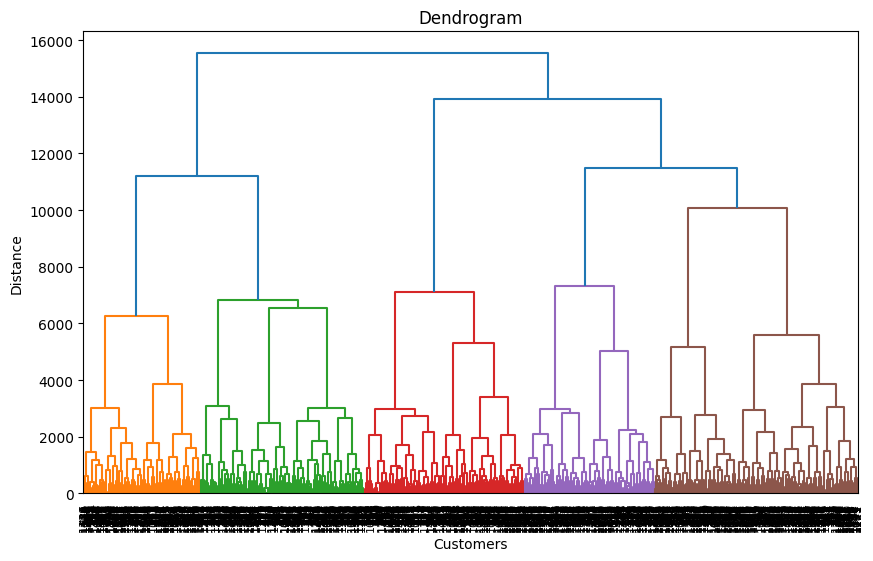

In [ ]:
#Dendogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the features relevant for clustering
features = dataset[['product_id', 'product_name','user_id', 'user_name']]

# Perform hierarchical clustering using Euclidean distance and Ward's linkage
Z = linkage(features, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [ ]:
#Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#discounted_price,actual_price
features = ['product_name','product_id']

# Extract the target variable (price)
target = ['actual_price']

# Split the dataset into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=0)

# Choose a regression model
regression_model = LinearRegression()

# Train the regression model
regression_model.fit(train_data, train_target)

# Use the trained model to predict the price of a product
new_product = pd.DataFrame([[134, 346]], columns=features)
predicted_price = regression_model.predict(new_product)

# Display the predicted price
print(f"Predicted price: {predicted_price}")


Predicted price: [[141.21054612]]
